In [21]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [22]:
data = load_wine()
X, y = data.data, data.target

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
transform  = StandardScaler()
X = transform.fit_transform(X)
df = pd.DataFrame(X)
df.columns = data.feature_names
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


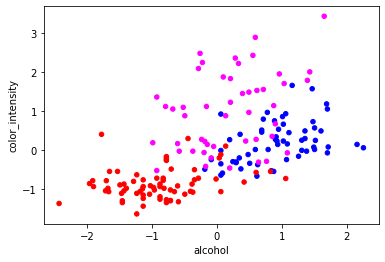

In [24]:
df2 = df[['alcohol', "color_intensity"]]
colors = []
for ci in y:
    if ci == 0:
        colors.append('blue')
    elif ci ==1:
        colors.append("red")
    elif ci == 2:
        colors.append("magenta")
#_ = plt.figure(figsize=(20,20))
df.plot.scatter("alcohol", "color_intensity", c = colors)
plt.show()

In [25]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=3)
clf=clf.fit(df2)

In [26]:
clf.cluster_centers_

array([[-0.99779866, -0.8442919 ],
       [ 0.40313085,  1.65389899],
       [ 0.75390118,  0.06029021]])

In [27]:
cluster_colors=[]
for ci in clf.labels_:
    if ci == 0:
        cluster_colors.append("blue")
    elif ci ==1:
        cluster_colors.append("red")
    elif ci == 2:
        cluster_colors.append("magenta")
        

KeyError: "None of [Float64Index([  1.5186125409891542,  0.24628962701506343,  0.19687902841412896,\n                1.6915496360924271,  0.29570022561600007,   1.4815545920384512,\n                1.7162549353928964,   1.3086174969351785,   2.2597715200031865,\n                1.0615645039304995,\n              ...\n                0.7156903137239518,  0.49334262001974233,  -0.9889753380083244,\n              -0.28487430794499297,   1.4321439934375169,   0.8762747591769932,\n               0.49334262001974233,   0.3327581745667009,   0.2092316780643626,\n                 1.395086044486816],\n             dtype='float64', length=178)] are in the [columns]"

<Figure size 1440x1440 with 0 Axes>

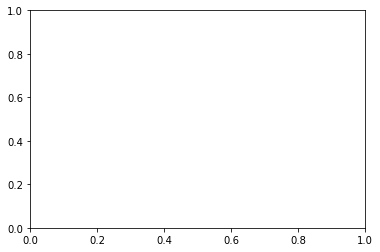

In [28]:
_ = plt.figure(figsize=(20,20))
df.plot.scatter(df["alcohol"], df["color_intensity"], c = colors)
plt.scatter(df['alcohol'], df['color_intensity'], c= cluster_colors, alpha=0.3, s=150)
#plt.scatter(df['alcohol'], df['color_intensity'], c= cluster_colors, alpha=0.3, s=150)
plt.show()